In [23]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using {device}")

using cpu


In [24]:
import torch
from torch import nn
import matplotlib.pyplot as plt

weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = X*weight + bias

X[:10],y[:10],X.size()

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

In [25]:
train_split = int(len(X)*0.8)
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [26]:
import torch
from torch import nn
import matplotlib.pyplot as plt

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),
                                               requires_grad=True
                                               )
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),
                                            requires_grad=True
                                            )
        
    def forward(self,x: torch.Tensor) -> torch.Tensor:
            return self.weights * x + self.bias



In [27]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [29]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
len(X_test),len(y_preds),y_preds

(10,
 10,
 tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]))

In [30]:
# def plot_predictions(train_data = X_train,
#                     train_label = y_train,
#                     test_data= X_test,
#                     test_label = y_test,
#                     predictions = None):
    
#     plt.figure(figsize=(10,7))
    
#     plt.scatter(train_data,train_label,c='b',s=4,label='Training Data')
    
#     plt.scatter(test_data,test_label,c='r',s=4,label='Test Data')
    
#     if predictions is not None:
#         plt.scatter(test_data,predicitons,c='g',s=4,label='predictions')
        
#     plt.legend(prop={'size':14})
        


def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test,
                     test_labels = y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

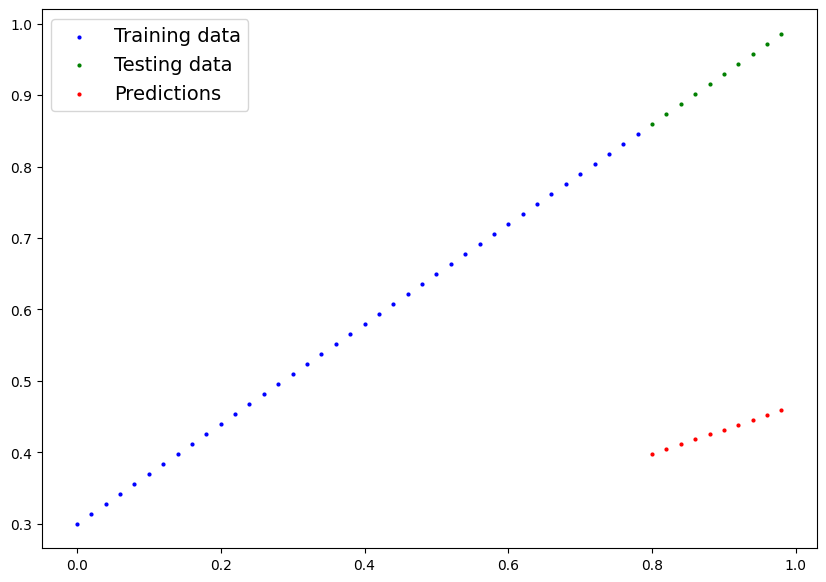

In [31]:
plot_predictions(predictions=y_preds)


In [32]:
y_test-y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [33]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [34]:
# torch.manual_seed(42)

epochs = 100

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    
    model_0.train()
    
    y_preds = model_0(X_train)
    
    loss = loss_fn(y_preds , y_train)  
#     loss = nn.L1Loss()(y_preds, y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_0.eval()
    
    with torch.inference_mode():
        
        test_pred = model_0(X_test)
        
        test_loss = loss_fn(test_pred,y_test.type(torch.float))
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'epoch:{epoch},loss:{loss},test_loss:{test_loss}') 
print(f'\nshow list:\nepoch:{epoch_count}\nloss:{train_loss_values}\ntest_loss:{test_loss_values}')

        
#     if epoch % 10 == 0:
#         epoch_count.append(epoch)
#         train_loss_values.append(loss.detach().numpy())
#         test_loss_values.append(test_loss.detach().numpy())
#         print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

epoch:0,loss:0.31288138031959534,test_loss:0.48106518387794495
epoch:10,loss:0.1976713240146637,test_loss:0.3463551998138428
epoch:20,loss:0.08908725529909134,test_loss:0.21729660034179688
epoch:30,loss:0.053148526698350906,test_loss:0.14464017748832703
epoch:40,loss:0.04543796554207802,test_loss:0.11360953003168106
epoch:50,loss:0.04167863354086876,test_loss:0.09919948130846024
epoch:60,loss:0.03818932920694351,test_loss:0.08886633068323135
epoch:70,loss:0.03476089984178543,test_loss:0.0805937647819519
epoch:80,loss:0.03132382780313492,test_loss:0.07232122868299484
epoch:90,loss:0.02788739837706089,test_loss:0.06473556160926819

show list:
epoch:[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
loss:[array(0.31288138, dtype=float32), array(0.19767132, dtype=float32), array(0.08908726, dtype=float32), array(0.05314853, dtype=float32), array(0.04543797, dtype=float32), array(0.04167863, dtype=float32), array(0.03818933, dtype=float32), array(0.0347609, dtype=float32), array(0.03132383, dtype=floa

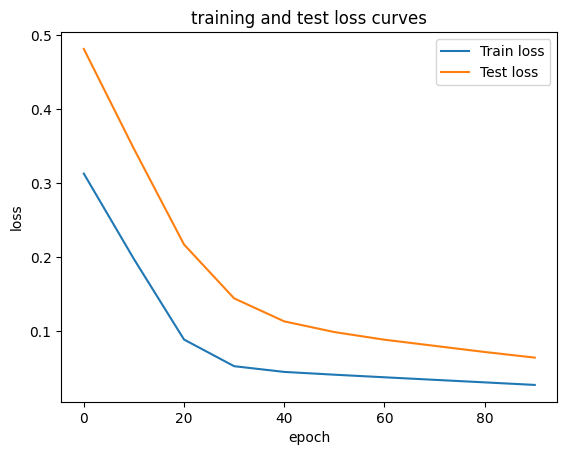

In [35]:
plt.plot(epoch_count,train_loss_values,label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [36]:
print(f"model has learned\n{model_0.state_dict()}")
print(f"original values are as followes weight:{weight}, bias:{bias}")

model has learned
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])
original values are as followes weight:0.7, bias:0.3


In [37]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds    

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

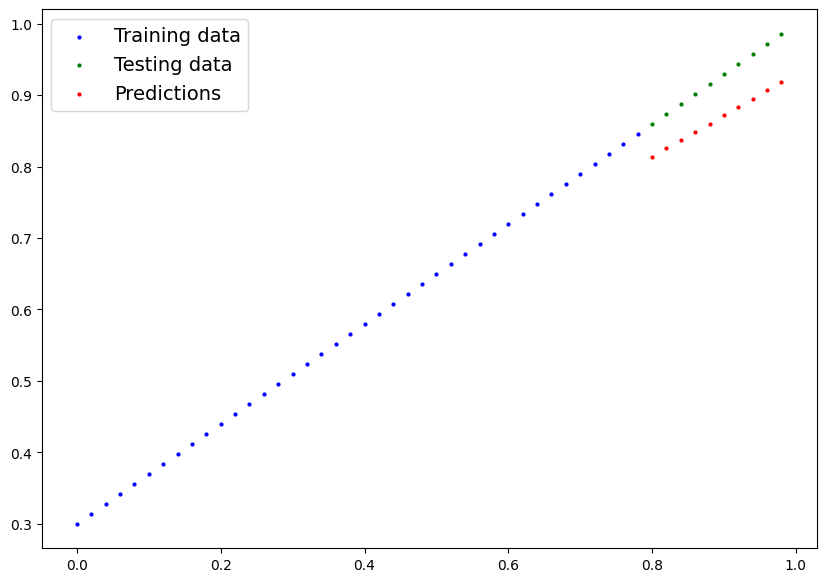

In [38]:
plot_predictions(predictions=y_preds)

In [39]:
from pathlib import Path

model_path = Path("Model")
model_path.mkdir(parents=True,exist_ok=True)

model_name = "01_pytorch_workflow_model_0.pth"
model_path = model_path / model_name

print(f"saving model to {model_path}")
torch.save(obj=model_0.state_dict(),
          f=model_path)


saving model to Model\01_pytorch_workflow_model_0.pth


In [51]:
for file in Path("Model").glob("*.pth"):
    print(f'suffix:{file.suffix}|',f'file name: {file.name}',f'|file location:{file}')


suffix:.pth| file name: 01_pytorch_workflow_model_0.pth |file location:Model\01_pytorch_workflow_model_0.pth
suffix:.pth| file name: computerVision_model_2.pth |file location:Model\computerVision_model_2.pth


In [41]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=model_path))

<All keys matched successfully>

In [42]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    

In [43]:
y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

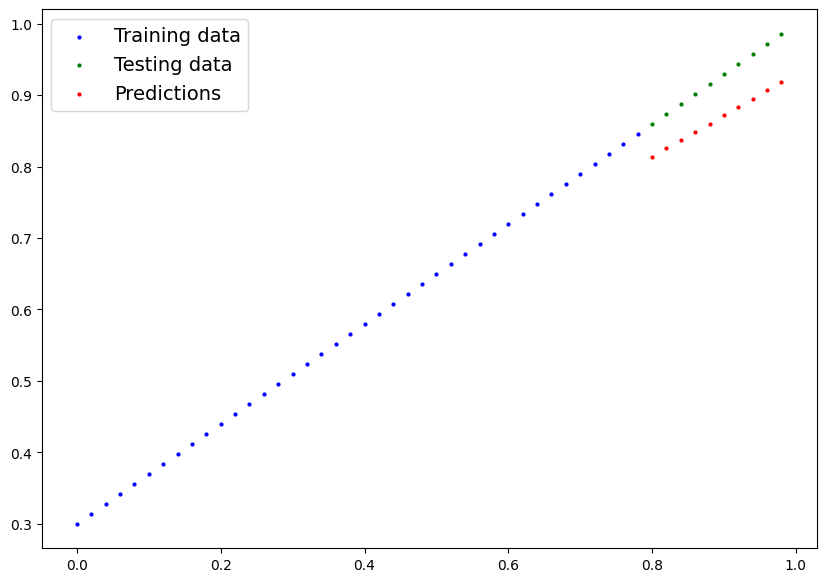

In [44]:
plot_predictions(predictions=loaded_model_preds)

In [45]:
next(loaded_model_0.parameters()).device


device(type='cpu')